# CryptoCurrency Price Prediction

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

from matplotlib import pyplot as plt
%matplotlib inline

from statsmodels.tsa.seasonal import seasonal_decompose

from sklearn.metrics import mean_squared_error

from pandas.plotting import autocorrelation_plot

from statsmodels.graphics.tsaplots import plot_pacf

from statsmodels.tsa.arima_model import ARIMA

In [2]:
bitcoin_price = pd.read_csv('D:/Msc CS Project Final/cryptocurrencypricehistory/bitcoin_price.csv', header=0, parse_dates=[0])

In [3]:
bitcoin_price.head()

,Date,Open,High,Low,Close,Volume,Market Cap
0,2018-02-20,11231.8,11958.5,11231.80,11403.7,"9,92,65,40,000","1,89,53,60,00,000"
1,2018-02-19,10552.6,11273.8,10513.20,11225.3,"7,65,20,90,000","1,78,05,50,00,000"
2,2018-02-18,11123.4,11349.8,10326.00,10551.8,"8,74,40,10,000","1,87,66,30,00,000"
3,2018-02-17,10207.5,11139.5,10149.40,11112.7,"8,66,08,80,000","1,72,19,10,00,000"
4,2018-02-16,10135.7,10324.1,9824.82,10233.9,"7,29,61,60,000","1,70,96,00,00,000"


In [5]:
bitcoin_price = bitcoin_price.sort_values(by='Date', ascending = True)

In [7]:
bitcoin_price.head(25)

,Date,Open,High,Low,Close,Volume,Market Cap
1759,2013-04-28,135.30,135.98,132.10,134.21,0,"1,50,05,20,000"
1758,2013-04-29,134.44,147.49,134.00,144.54,0,"1,49,11,60,000"
1757,2013-04-30,144.00,146.93,134.05,139.00,0,"1,59,77,80,000"
1756,2013-05-01,139.00,139.89,107.72,116.99,0,"1,54,28,20,000"
1755,2013-05-02,116.38,125.60,92.28,105.21,0,"1,29,21,90,000"
1754,2013-05-03,106.25,108.13,79.10,97.75,0,"1,18,00,70,000"
1753,2013-05-04,98.10,115.00,92.50,112.50,0,"1,08,98,90,000"
1752,2013-05-05,112.90,118.80,107.14,115.91,0,"1,25,47,60,000"
1751,2013-05-06,115.98,124.66,106.64,112.30,0,"1,28,94,70,000"
1750,2013-05-07,112.25,113.44,97.70,111.50,0,"1,24,84,70,000"


In [8]:
bitcoin_price.tail()

,Date,Open,High,Low,Close,Volume,Market Cap
4,2018-02-16,10135.7,10324.1,9824.82,10233.9,"7,29,61,60,000","1,70,96,00,00,000"
3,2018-02-17,10207.5,11139.5,10149.40,11112.7,"8,66,08,80,000","1,72,19,10,00,000"
2,2018-02-18,11123.4,11349.8,10326.00,10551.8,"8,74,40,10,000","1,87,66,30,00,000"
1,2018-02-19,10552.6,11273.8,10513.20,11225.3,"7,65,20,90,000","1,78,05,50,00,000"
0,2018-02-20,11231.8,11958.5,11231.80,11403.7,"9,92,65,40,000","1,89,53,60,00,000"


In [10]:
bitcoin_price.shape

(1760, 7)

In [11]:
bitcoin_price.describe()

,Open,High,Low,Close
count,1760.000000,1760.000000,1760.000000,1760.000000
mean,1479.574239,1536.991108,1418.251273,1485.747000
std,2950.457188,3092.950362,2780.859459,2959.265478
min,68.500000,74.560000,65.530000,68.430000
25%,274.730000,279.857500,268.640000,274.875000
50%,480.715000,495.195000,472.510000,482.810000
75%,870.085000,900.222500,831.682500,871.370000
max,19475.800000,20089.000000,18974.100000,19497.400000


In [17]:
bitcoin_price.High.dtype

dtype('float64')

In [18]:
bitcoin_price.Volume.dtype

dtype('O')

In [25]:
bitcoin_price.Volume.to_numeric()

AttributeError: 'Series' object has no attribute 'to_numeric'

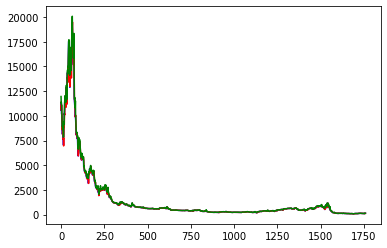

In [26]:
plt.plot(bitcoin_price.Open, color='blue')
plt.plot(bitcoin_price.Close, color='red')
plt.plot(bitcoin_price.High, color = 'green')

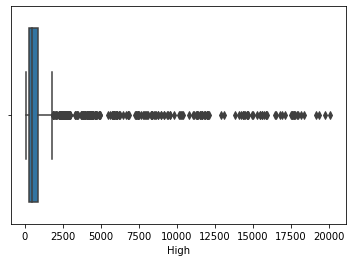

In [27]:
sns.boxplot(bitcoin_price.High)

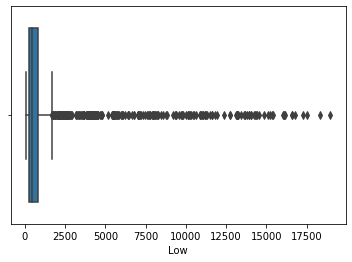

In [28]:
sns.boxplot(bitcoin_price.Low)

In [33]:
bitcoin_price_high = bitcoin_price.iloc[:,[0,2]]
bitcoin_price_high.head()

,Date,High
1759,2013-04-28,135.98
1758,2013-04-29,147.49
1757,2013-04-30,146.93
1756,2013-05-01,139.89
1755,2013-05-02,125.60


In [34]:
bitcoin_price_high.tail()

,Date,High
4,2018-02-16,10324.1
3,2018-02-17,11139.5
2,2018-02-18,11349.8
1,2018-02-19,11273.8
0,2018-02-20,11958.5


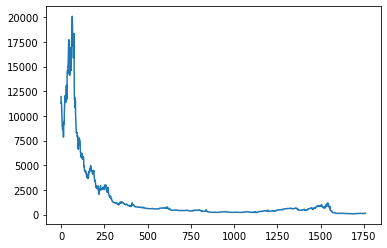

In [35]:
plt.plot(bitcoin_price_high.High)